<a href="https://colab.research.google.com/github/dk-wei/ml-algo-implementation/blob/main/ELI5_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

原文地址：[Debug Models and Explain Predictions using Eli5
](https://python-bloggers.com/2021/07/debug-models-and-explain-predictions-using-eli5/?utm_source=feedburner&utm_medium=feed&utm_campaign=Feed%3A+Python-bloggers+%28Python-bloggers%29)

An important step when working with machine learning models is debugging. For example, when we are working with text we have to check if we have any noise in our features that affect the predictions like unwanted symbols or numbers. We have to know what is responsible for a prediction and somehow explain the model’s output. In the past, we talked about Feature Importances that can also help us debug a machine learning model but now there is an easier and more functional way to do this.

Eli5 is a library that can help us debug ML models and explain their outputs in a creative way. We will show you some examples using it with a simple classification problem, with text, and with an image classification problem using Keras.

ELI5 可以对各种不同的模型进行解释，为什么这个模型会判断为某个label，可以说eli5是这些个解释模型里面最好用的了。
- Text
- Structured
- Image

In [1]:
pip install eli5

     |████████████████████████████████| 112kB 4.2MB/s 


# Eli5 explains IRIS Prediction

For this simple model, we will use the Iris dataset to predict the type of irises (Setosa, Versicolour, and Virginica).

In [24]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
import pandas as pd
import eli5
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

iris = datasets.load_iris()
features=pd.DataFrame(iris['data'])
target=iris['target']
model=LogisticRegression(max_iter=1000)
model.fit(features,target)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
set(target)

{0, 1, 2}

## global weights

Now that we have a trained model we can use Eli5 to get the feature importances and to explain a prediction by showing us what feature is responsible for the model’s output.

Firstly, let’s get the Feature importances for every class. In other words, the weights of the model.

In [26]:
eli5.explain_weights(model)

Explanation(estimator="LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,\n                   intercept_scaling=1, l1_ratio=None, max_iter=1000,\n                   multi_class='auto', n_jobs=None, penalty='l2',\n                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,\n                   warm_start=False)", description="\nFeatures with largest coefficients per class.\nCaveats:\n1. Be careful with features which are not\n   independent - weights don't show their importance.\n2. If scale of input features is different then scale of coefficients\n   will also be different, making direct comparison between coefficient values\n   incorrect.\n3. Depending on regularization, rare features sometimes may have high\n   coefficients; this doesn't mean they contribute much to the\n   classification result for most examples.\n", error=None, method='linear model', is_regression=False, targets=[TargetExplanation(target=0, feature_weights=FeatureWeights(pos=[FeatureWeight(feature='<BIAS>', weight=9.849024181910684, std=None, value=None), FeatureWeight(feature='x1', weight=0.9668851606876092, std=None, value=None)], neg=[FeatureWeight(feature='x2', weight=-2.5166937562711422, std=None, value=None), FeatureWeight(feature='x3', weight=-1.0807841220063215, std=None, value=None), FeatureWeight(feature='x0', weight=-0.42316548743110555, std=None, value=None)], pos_remaining=0, neg_remaining=0), proba=None, score=None, weighted_spans=None, heatmap=None), TargetExplanation(target=1, feature_weights=FeatureWeights(pos=[FeatureWeight(feature='<BIAS>', weight=2.2381799213601083, std=None, value=None), FeatureWeight(feature='x0', weight=0.5343132208947975, std=None, value=None)], neg=[FeatureWeight(feature='x3', weight=-0.9435521117527775, std=None, value=None), FeatureWeight(feature='x1', weight=-0.32159715786868326, std=None, value=None), FeatureWeight(feature='x2', weight=-0.20666271922828158, std=None, value=None)], pos_remaining=0, neg_remaining=0), proba=None, score=None, weighted_spans=None, heatmap=None), TargetExplanation(target=2, feature_weights=FeatureWeights(pos=[FeatureWeight(feature='x2', weight=2.7233564754994166, std=None, value=None), FeatureWeight(feature='x3', weight=2.024336233759095, std=None, value=None)], neg=[FeatureWeight(feature='<BIAS>', weight=-12.087204103270642, std=None, value=None), FeatureWeight(feature='x1', weight=-0.6452880028189426, std=None, value=None), FeatureWeight(feature='x0', weight=-0.11114773346370344, std=None, value=None)], pos_remaining=0, neg_remaining=0), proba=None, score=None, weighted_spans=None, heatmap=None)], feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

## local weights

We can explain one output just by inputting the model and one test input.

In [27]:
eli5.explain_prediction(model, features.head(1))

Explanation(estimator="LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,\n                   intercept_scaling=1, l1_ratio=None, max_iter=1000,\n                   multi_class='auto', n_jobs=None, penalty='l2',\n                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,\n                   warm_start=False)", description=None, error=None, method='linear model', is_regression=False, targets=[TargetExplanation(target=0, feature_weights=FeatureWeights(pos=[FeatureWeight(feature='<BIAS>', weight=9.849024181910684, std=None, value=1.0), FeatureWeight(feature='x1', weight=3.384098062406632, std=None, value=3.5)], neg=[FeatureWeight(feature='x2', weight=-3.5233712587795987, std=None, value=1.4), FeatureWeight(feature='x0', weight=-2.158143985898638, std=None, value=5.1), FeatureWeight(feature='x3', weight=-0.2161568244012643, std=None, value=0.2)], pos_remaining=0, neg_remaining=0), proba=0.9815831427829151, score=7.335450175237815, weighted_spans=None, heatmap=None), TargetExplanation(target=1, feature_weights=FeatureWeights(pos=[FeatureWeight(feature='x0', weight=2.724997426563467, std=None, value=5.1), FeatureWeight(feature='<BIAS>', weight=2.2381799213601083, std=None, value=1.0)], neg=[FeatureWeight(feature='x1', weight=-1.1255900525403915, std=None, value=3.5), FeatureWeight(feature='x2', weight=-0.2893278069195942, std=None, value=1.4), FeatureWeight(feature='x3', weight=-0.18871042235055552, std=None, value=0.2)], pos_remaining=0, neg_remaining=0), proba=0.01841684271593623, score=3.3595490661130336, weighted_spans=None, heatmap=None), TargetExplanation(target=2, feature_weights=FeatureWeights(pos=[FeatureWeight(feature='x2', weight=3.812699065699183, std=None, value=1.4), FeatureWeight(feature='x3', weight=0.40486724675181907, std=None, value=0.2)], neg=[FeatureWeight(feature='<BIAS>', weight=-12.087204103270642, std=None, value=1.0), FeatureWeight(feature='x1', weight=-2.2585080098662993, std=None, value=3.5), FeatureWeight(feature='x0', weight=-0.5668534406648875, std=None, value=5.1)], pos_remaining=0, neg_remaining=0), proba=1.4501148619409038e-08, score=-10.694999241350827, weighted_spans=None, heatmap=None)], feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

In this prediction, class 0 has the highest probability. Also, we can see the contribution of every feature and Bias.

# Eli5 explains Text Classification

We will use some sample positive and negative tweets and we will train a logistic regression classifier to predict if a tweet is positive or negative.

In [36]:
import numpy as np
import nltk   # Python library for NLP
from nltk.corpus import twitter_samples    # sample Twitter dataset from NLTK
from collections import Counter
import eli5

nltk.download('twitter_samples')
 
# select the set of positive and negative tweets
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

pos=pd.DataFrame({"tweet":all_positive_tweets,'positive':[1]*len(all_positive_tweets)})
neg=pd.DataFrame({"tweet":all_negative_tweets,'positive':[0]*len(all_negative_tweets)})

data=pd.concat([pos,neg])

from sklearn.feature_extraction.text import TfidfVectorizer


# use tfidf by removing tokens that don't appear in at least 5 documents
vect = TfidfVectorizer(min_df=5,ngram_range=(1, 3), stop_words='english')
 
# Fit and transform
X = vect.fit_transform(data.tweet)

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X,data['positive'])

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## global weights

In [29]:
eli5.show_weights(model, vec=vect)

Weight?,Feature
+4.713,thanks
+4.040,thank
+3.384,happy
+3.235,great
+2.787,welcome
+2.691,glad
+2.644,nice
+2.536,fback
+2.499,ff
+2.305,goodnight


## local weights

Then the fun part. Let’s get the contribution of every word in an input sentence.

In [30]:
# 直接输入text即可

test="I'm glad this is not a sad tweet"
eli5.explain_prediction(model, test, vec=vect)

Explanation(estimator="LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,\n                   intercept_scaling=1, l1_ratio=None, max_iter=100,\n                   multi_class='auto', n_jobs=None, penalty='l2',\n                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,\n                   warm_start=False)", description=None, error=None, method='linear model', is_regression=False, targets=[TargetExplanation(target=0, feature_weights=FeatureWeights(pos=[FeatureWeight(feature='sad', weight=2.0537330286716324, std=None, value=0.5185407528006689), FeatureWeight(feature='<BIAS>', weight=0.27129750791477675, std=None, value=1.0)], neg=[FeatureWeight(feature='glad', weight=-1.654299511276909, std=None, value=0.6148541403938301), FeatureWeight(feature='tweet', weight=-0.4324552411216093, std=None, value=0.5941968307938705)], pos_remaining=0, neg_remaining=0), proba=0.559288699737621, score=-0.2382757841878908, weighted_spans=WeightedSpans(docs_weighted_spans=[DocWeightedSpans(document="i'm glad this is not a sad tweet", spans=[('glad', [(4, 8)], -1.654299511276909), ('sad', [(23, 26)], 2.0537330286716324), ('tweet', [(27, 32)], -0.4324552411216093)], preserve_density=False, vec_name=None)], other=FeatureWeights(pos=[FeatureWeight(feature='<BIAS>', weight=0.27129750791477675, std=None, value=1.0)], neg=[FeatureWeight(feature=<FormattedFeatureName 'Highlighted in text (sum)'>, weight=-0.03302172372688589, std=None, value=None)], pos_remaining=0, neg_remaining=0)), heatmap=None)], feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

Pretty helpful, right? It gave us the contribution of every feature by highlighting them in the sentence.

# Eli5 explains Keras image models

Eli5 is so powerful that can work also with Keras image classification models. We will use a pre-trained model to get the labels of the image below which is my desk.

这个牛逼了，直接调用模型，网上啥图片resize之后，都能往里怼

In [47]:
from keras.applications.xception import Xception
from keras.preprocessing import image
from keras.applications.xception import preprocess_input, decode_predictions
import numpy as np
 
import PIL
from PIL import Image
import requests
from io import BytesIO
 
 
# load the model
model = Xception(weights='imagenet', include_top=True)
  
# chose the URL image that you want
#URL = "https://images.unsplash.com/photo-1529429617124-95b109e86bb8?ixlib=rb-1.2.1&amp;ixid=eyJhcHBfaWQiOjEyMDd9&amp;auto=format&amp;fit=crop&amp;w=500&amp;q=60"
URL = 'https://c402277.ssl.cf1.rackcdn.com/photos/18134/images/hero_full/Medium_WW226365.jpg?1574452099'
 
# get the image
response = requests.get(URL)
img = Image.open(BytesIO(response.content))
# resize the image according to each model (see documentation of each model)
img = img.resize((299,299))
 
##############################################
# if you want to read the image from your PC 
#############################################
# img_path = 'myimage.jpg'
# img = image.load_img(img_path, target_size=(299, 299))
#############################################
 
# convert to numpy array
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

Now that we have the processed image(x) and the Keras model let’s check the top 20 labels the model predicted.

可以看到前两名的为tiger，tiger cat和zebra。zebra可能是因为身上的条纹

In [48]:
features = model.predict(x)
 
# return the top 20 detected objects
label = decode_predictions(features, top=20)
label

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2401: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


[[('n02129604', 'tiger', 0.6213872),
  ('n02123159', 'tiger_cat', 0.19307785),
  ('n02391049', 'zebra', 0.0061755455),
  ('n02128925', 'jaguar', 0.0023912373),
  ('n02422699', 'impala', 0.00092755083),
  ('n01798484', 'prairie_chicken', 0.000771043),
  ('n01773157', 'black_and_gold_garden_spider', 0.00074851664),
  ('n02127052', 'lynx', 0.000732751),
  ('n03662601', 'lifeboat', 0.00071267295),
  ('n02279972', 'monarch', 0.00069207954),
  ('n01924916', 'flatworm', 0.00062689837),
  ('n01773797', 'garden_spider', 0.0006213258),
  ('n02123045', 'tabby', 0.00054259866),
  ('n02124075', 'Egyptian_cat', 0.0005336714),
  ('n03792782', 'mountain_bike', 0.00051637203),
  ('n02128385', 'leopard', 0.00051107357),
  ('n04116512', 'rubber_eraser', 0.00051085936),
  ('n03379051', 'football_helmet', 0.0004943351),
  ('n02643566', 'lionfish', 0.00049222825),
  ('n01968897', 'chambered_nautilus', 0.00047278727)]]

Then, we can check what part of the image is responsible for every label. We will need also the class Ids of the labels which can be obtained as follows.

In [49]:
np.argsort(features)[0, ::-1][:10]

array([292, 282, 340, 290, 352,  83,  72, 287, 625, 323])

Let’s check the label desk with class id 258.

In [50]:
x.shape

(1, 299, 299, 3)

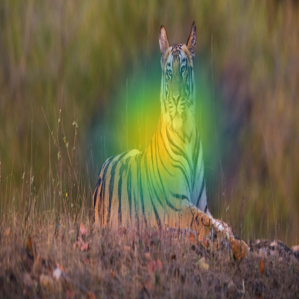

In [51]:
eli5.show_prediction(model, x, targets=[292])

As you can see, the most important part of the image for the dog is where the actual dog's head is.

This time, let’s check a strange label like zebra.

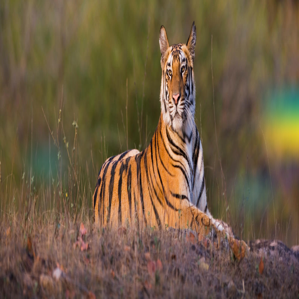

In [53]:
eli5.show_prediction(model, x, targets=[340])

# Summing it up

Eli5 is a very useful library that helps us debug classifiers and explain their predictions. It’s working with most of the python ML libraries and also with more complex models like Keras or when using Text and Vectorizers.